In [ ]:
# Prototype tool to get population-consumption curve points by country, region, income group
# Cite "City population by sex, city and city type" http://data.un.org/Data.aspx?d=POP&f=tableCode:240
# Cite "Electric power consumption (kWh per capita)" http://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [1]:
from os.path import expanduser, join
from pandas import read_csv
source_folder = expanduser('~/Documents/infrastructure-planning')
country_region_income_table_path = join(source_folder, 'country-region-income.csv')
demographic_by_year_by_city_table_path = join(source_folder, 'demographic-by-year-by-city.csv')
demographic_by_year_by_country_table_path = join(source_folder, 'demographic-by-year-by-country.csv')
electricity_consumption_by_year_table_path = join(source_folder, 'electricity-consumption-by-year.csv')

In [2]:
# country_region_income_table = read_csv(country_region_income_table_path, encoding='utf-8-sig')
# country_region_income_table[:2]

In [3]:
from StringIO import StringIO  # Note that cStringIO cannot handle unicode
country_region_income_table = read_csv(StringIO(open(country_region_income_table_path, 'r').read().decode('utf-8-sig')))
country_region_income_table[:2]

,Country Name,Country Code,Region,IncomeGroup,SpecialNotes,Unnamed: 5
0,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,SNA data for 2000-2011 are updated from offici...,NaN
1,Afghanistan,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,NaN


In [13]:
demographic_by_year_by_country_table = read_csv(demographic_by_year_by_country_table_path)
demographic_by_year_by_country_table[:2]

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Const. mortality (Medium),40190.280
1,Afghanistan,2100,Constant-fertility scenario,845843.367


In [6]:
electricity_consumption_by_year_table = read_csv(electricity_consumption_by_year_table_path, skiprows=3)
electricity_consumption_by_year_table[232:234]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
232,Uruguay,URY,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,2413.354293,2586.223362,2659.719201,2803.153377,2808.356544,2931.917628,NaN,NaN,NaN,NaN
233,United States,USA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,4049.786629,4182.175501,4433.606021,4690.486256,4970.446456,5234.685002,...,13657.449509,13663.424680,12913.711429,13394.014607,13240.357987,12954.153262,NaN,NaN,NaN,NaN


In [7]:
target_year = 2015

In [8]:
# World

In [9]:
# Get countries
print len(country_region_income_table['Country Name'])
country_region_income_table['Country Name'][:3]

247


0          Aruba
1    Afghanistan
2         Angola
Name: Country Name, dtype: object

In [10]:
country_region_income_table['Country Name'][:3].values

array(['Aruba', 'Afghanistan', 'Angola'], dtype=object)

In [11]:
country_names = country_region_income_table['Country Name'].values
country_names[:5]

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra'], dtype=object)

In [11]:
# For each country, get projected population

In [ ]:
def get_population_by_year(country_name):
    pass

get_population_by_year('United States')

In [ ]:
def get_population_by_year_by_country_for_region(region_name):
    pass

In [ ]:
def get_population_by_year_by_country_for_income_group(income_group_name):
    pass

In [ ]:
def get_population_by_year_model(population_by_year):
    pass

In [14]:
local_table = demographic_by_year_by_country_table[demographic_by_year_by_country_table['Country or Area'] == 'Afghanistan']
local_table[:5]

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Const. mortality (Medium),40190.280
1,Afghanistan,2100,Constant-fertility scenario,845843.367
2,Afghanistan,2100,High variant,92331.174
3,Afghanistan,2100,Instant replacement,52174.837
4,Afghanistan,2100,Low variant,35950.480


In [15]:
local_table = demographic_by_year_by_country_table[demographic_by_year_by_country_table['Country or Area'] == 'Afghanistan']
min(local_table[local_table['Variant'] == 'Low variant']['Year(s)'])
local_table[local_table['Year(s)'] < 2010]
local_table[local_table['Year(s)'] < 2010][['Year(s)', 'Value']]

,Year(s),Value
152,2005,24860.855
153,2000,20595.360
154,1995,17586.073
155,1990,11731.193
156,1985,11528.977
157,1980,13180.431
158,1975,12551.790
159,1970,11015.621
160,1965,9765.015
161,1960,8774.440


In [16]:
min(local_table[local_table['Variant'] == 'Low variant']['Year(s)'])

2010

In [21]:
local_table[local_table['Year(s)'] < 2010]

,Country or Area,Year(s),Variant,Value
152,Afghanistan,2005,Medium variant,24860.855
153,Afghanistan,2000,Medium variant,20595.360
154,Afghanistan,1995,Medium variant,17586.073
155,Afghanistan,1990,Medium variant,11731.193
156,Afghanistan,1985,Medium variant,11528.977
157,Afghanistan,1980,Medium variant,13180.431
158,Afghanistan,1975,Medium variant,12551.790
159,Afghanistan,1970,Medium variant,11015.621
160,Afghanistan,1965,Medium variant,9765.015
161,Afghanistan,1960,Medium variant,8774.440


In [22]:
local_table[local_table['Year(s)'] < 2010][['Year(s)', 'Value']]

,Year(s),Value
152,2005,24860.855
153,2000,20595.360
154,1995,17586.073
155,1990,11731.193
156,1985,11528.977
157,1980,13180.431
158,1975,12551.790
159,1970,11015.621
160,1965,9765.015
161,1960,8774.440


In [80]:
local_table.columns

Index([u'Country or Area', u'Year(s)', u'Variant', u'Value'], dtype='object')

In [83]:
xs = local_table['Year(s)'].values
xs

array([2100, 2095, 2090, 2085, 2080, 2075, 2070, 2065, 2060, 2055, 2050,
       2045, 2040, 2035, 2030, 2025, 2020, 2015, 2010, 2005, 2000, 1995,
       1990, 1985, 1980, 1975, 1970, 1965, 1960, 1955, 1950])

In [84]:
ys = local_table['Value'].values
ys

array([ 59248.866,  60449.323,  61525.463,  62421.696,  63028.228,
        63218.469,  62895.237,  62024.42 ,  60633.923,  58792.265,
        56551.242,  53910.84 ,  50833.609,  47318.793,  43499.632,
        39571.1  ,  35666.904,  32006.788,  28397.812,  24860.855,
        20595.36 ,  17586.073,  11731.193,  11528.977,  13180.431,
        12551.79 ,  11015.621,   9765.015,   8774.44 ,   8009.614,
         7450.738])

In [ ]:
# Scatter plot value vs year

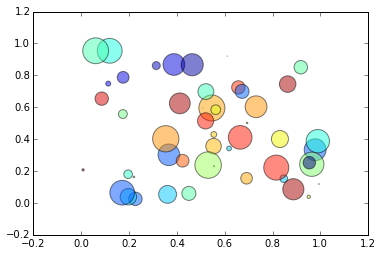

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

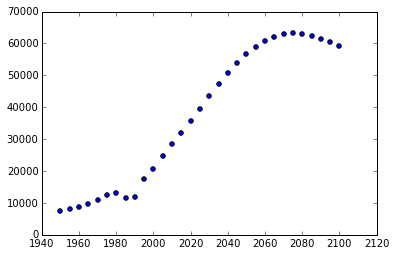

In [85]:
plt.scatter(xs, ys)

In [ ]:
# Get the lowest year for which we have only estimates
# Exclude all estimates

In [ ]:
# I think we should connect the dots in the middle, but extrapolate using at least two and at most five points on each side
# What if we have fewer than two points?
# Then duplicate data point at a fixed interval (unit 1) or use slope (default assumes slope of 0) if we have one
# Also it should have an option for truncating negative outputs to zero

In [17]:
from scipy.interpolate import interp1d

In [27]:
interp1d?

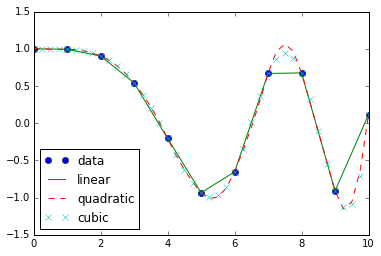

In [31]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), 'x')
plt.legend(['data', 'linear', 'quadratic', 'cubic'], loc='best')

In [92]:
f(11)

ValueError: A value in x_new is above the interpolation range.

In [ ]:
def get_population(2015, 'United States')

In [ ]:
def get_consumption_per_capita(2015, 'United States')

In [ ]:
def forecast_consumption(target_year, country_name):
    pass

In [ ]:
def get_population_electricity_consumption_packs
def get_population_electricity_consumption_packs_for_region
def get_population_electricity_consumption_packs_for_income_group

In [32]:
country_region_income_table['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
dtype: int64

In [31]:
country_region_income_table['IncomeGroup'].value_counts()

Upper middle income     53
Lower middle income     51
High income: nonOECD    47
High income: OECD       32
Low income              31
dtype: int64

In [38]:
x = True
x &= True

In [39]:
x

True

In [40]:
x &= False
x

False

In [35]:
conditions = []
conditions.append(country_region_income_table['Region'] == 'North America')
country_region_income_table[conditions]

ValueError: Item wrong length 1 instead of 247.

In [37]:
country_region_income_table.filter?

In [36]:
country_region_income_table[country_region_income_table['Region'] == 'North America']

,Country Name,Country Code,Region,IncomeGroup,SpecialNotes,Unnamed: 5
25,Bermuda,BMU,North America,High income: nonOECD,NaN,NaN
33,Canada,CAN,North America,High income: OECD,Fiscal year end: March 31; reporting period fo...,NaN
234,United States,USA,North America,High income: OECD,Fiscal year end: September 30; reporting perio...,NaN


In [46]:
def get_country_names(region_name=None, income_group_name=None):
    t = country_region_income_table
    if region_name:
        t = t[t['Region'] == region_name]
    if income_group_name:
        t = t[t['IncomeGroup'] == income_group_name]
    return t['Country Name'].values

print(get_country_names(region_name='North America'))
print(get_country_names(income_group_name='High income: OECD'))

['Bermuda' 'Canada' 'United States']
['Australia' 'Austria' 'Belgium' 'Canada' 'Switzerland' 'Chile'
 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France'
 'United Kingdom' 'Greece' 'Hungary' 'Ireland' 'Iceland' 'Israel' 'Italy'
 'Japan' 'Korea, Rep.' 'Luxembourg' 'Netherlands' 'Norway' 'New Zealand'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Sweden' 'United States']


In [71]:
from os.path import expanduser
t = country_region_income_table['Country Name']
t.to_csv(expanduser('~/Experiments/infrastructure/country_region_income_table_country_names.csv'), index=False)

In [32]:
from os.path import expanduser, join
target_folder = expanduser('~/Experiments/infrastructure')

country_region_income_table_country_names = country_region_income_table['Country Name'].unique()
demographic_by_year_by_country_table_country_names = demographic_by_year_by_country_table['Country or Area'].unique()

open(join(target_folder, 'country_region_income_table_country_names.txt'), 'w').write(
    '\n'.join(country_region_income_table_country_names))
open(join(target_folder, 'demographic_by_year_by_country_table_country_names.txt'), 'w').write(
    '\n'.join(demographic_by_year_by_country_table_country_names))

In [35]:
from nltk.metrics.distance import edit_distance

In [39]:
edit_distance('ab', 'ba', transpositions=True)

1

In [41]:
country_region_income_table_country_names[0]

'Aruba'

In [50]:
from nltk.metrics.distance import edit_distance
target_country_name = 'United States'
source_country_names = demographic_by_year_by_country_table_country_names
distance_packs = []
for source_country_name in source_country_names:
    if target_country_name in source_country_name:
        distance_packs.append((0, source_country_name))
    distance_packs.append((edit_distance(source_country_name, target_country_name, transpositions=False), source_country_name))
sorted(distance_packs, reverse=False)[:5]

[(0, 'United States Virgin Islands'),
 (0, 'United States of America'),
 (7, 'United Kingdom'),
 (9, 'United Arab Emirates'),
 (9, 'Uzbekistan')]

In [53]:
zip(*[('a', 1), ('b', 2)])

[('a', 'b'), (1, 2)]

In [72]:
'one, two'.split(',')

['one', ' two']

In [75]:
'one, two'.split()[0].rstrip(',')

'one'

In [76]:
target_country_names = country_region_income_table_country_names
source_country_names = demographic_by_year_by_country_table_country_names

import csv
from os.path import expanduser, join
target_folder = expanduser('~/Experiments/infrastructure')
target_path = join(target_folder, 'matches.csv')
csv_writer = csv.writer(open(target_path, 'w'))
for target_country_name in target_country_names:
    distance_packs = []
    if target_country_name in source_country_names:
        continue
    for source_country_name in source_country_names:
        if (target_country_name.split()[0].rstrip(',') in source_country_name) or (target_country_name in source_country_name) or (source_country_name in target_country_name):
            distance_packs.append((0, source_country_name))
        else:
            distance_packs.append((edit_distance(source_country_name, target_country_name), source_country_name))
    ranked_country_names = list(zip(*sorted(distance_packs))[1])[:10]
    csv_writer.writerow([target_country_name] + ranked_country_names)

In [83]:
open(join(target_folder, 'country_region_income_table_country_names.diff'), 'w').write(
    '\n'.join(set(country_region_income_table_country_names).difference(demographic_by_year_by_country_table_country_names)))

In [84]:
open(join(target_folder, 'demographic_by_year_by_country_table_country_names.diff'), 'w').write(
    '\n'.join(set(demographic_by_year_by_country_table_country_names).difference(country_region_income_table_country_names)))

In [59]:
def get_demographic_by_year_by_country_table_country_name(
        country_region_income_table_country_name):
    try:
    except KeyError:
        pass
    return

get_demographic_by_year_by_country_table_country_name('United States')

In [52]:
t = demographic_by_year_by_country_table[
    demographic_by_year_by_country_table['Country or Area'] == country_name]
t

,Country or Area,Year(s),Variant,Value


In [79]:
from os.path import expanduser
from pandas import read_csv

world_bank_united_nations_country_name_table_path = expanduser(
    '~/Projects/infrastructure-planning/datasets/world-bank-united-nations-country-name.csv')
world_bank_united_nations_country_name_table = read_csv(
    world_bank_united_nations_country_name_table_path)

In [84]:
world_bank_country_names = country_region_income_table_country_names
united_nations_country_names = demographic_by_year_by_country_table_country_names
united_nations_country_name_by_world_bank_country_name = dict(world_bank_united_nations_country_name_table.values)

def get_united_nations_country_name(world_bank_country_name):
    if world_bank_country_name in united_nations_country_names:
        return world_bank_country_name
    return united_nations_country_name_by_world_bank_country_name[world_bank_country_name]

get_united_nations_country_name('United States')

'United States of America'

In [85]:
get_united_nations_country_name('Canada')

'Canada'

In [87]:
def get_year_population_packs(world_bank_country_name):
    united_nations_country_name = get_united_nations_country_name(world_bank_country_name)
    t = demographic_by_year_by_country_table[
        demographic_by_year_by_country_table['Country or Area'] == united_nations_country_name]
    fake_year = min(t[t['Variant'] == 'Low variant']['Year(s)'])
    t = t[t['Year(s)'] < fake_year]
    return t[['Year(s)', 'Value']]
    
country_name = 'United States'
get_year_population_packs(country_name)

,Year(s),Value
41183,2005,298165.797
41184,2000,284594.395
41185,1995,268039.654
41186,1990,254506.647
41187,1985,241870.002
41188,1980,230176.361
41189,1975,219439.031
41190,1970,209891.345
41191,1965,199686.185
41192,1960,186361.893


In [4]:
xys = [
    (1, 1),
    (2, 2),
    (3, 1),
    (4, 2),
]

def get_spline_interpolated_regression_extrapolated_function(xys, default_slope):
    xs, ys = zip(*xys)
    x_min, x_max = min(xs), max(xs)
    
    def f(x):
        pass
    
    return f

get_spline_interpolated_regression_extrapolated_function(xys, default_slope=1)

In [23]:
xs, ys = zip(*xys)
print xs
print ys

(1, 2, 3, 4)
(1, 2, 1, 2)


In [11]:
m = interp1d(*zip(*xys))

In [18]:
m(3.5)

array(1.5)

In [37]:
m(1.1)

array(1.1)

In [19]:
from sklearn.linear_model import LinearRegression

In [26]:
np.array(xs).reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4]])

In [27]:
model = LinearRegression()
model.fit(np.array(xs).reshape(-1, 1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.predict(1)

array([ 1.2])

In [29]:
model.coef_

array([ 0.2])

In [30]:
model.intercept_

1.0

In [31]:
model.predict(0)

array([ 1.])

In [34]:
model.rank_

1

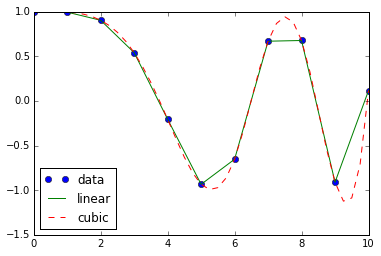

In [3]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

In [ ]:
def forecast_population(target_year, country_name):
    year_population_packs = get_year_population_packs(country_name)
    model = get_spline_interpolation_regression_extrapolation_model(
        year_population_packs)
    return model.predict(target_year)

print forecast_population(2010, country_name)
print forecast_population(2015, country_name)

In [ ]:
def forecast_consumption(target_year, country_name):
    year_consumption_packs = get_year_consumption_packs(country_name)
    model = get_spline_interpolation_regression_extrapolation_model(
        year_consumption_packs)
    return model.predict(target_year)

print forecast_consumption(2010, country_name)
print forecast_consumption(2015, country_name)

In [ ]:
def get_country_population_consumption_packs(target_year, region_name=None, income_group_name=None):
    country_population_consumption_packs = []
    country_names = get_country_names(region_name, income_group_name)
    for country_name in country_names:
        population = forecast_population(target_year, country_name)
        consumption = forecast_consumption(target_year, country_name)
        country_population_consumption_packs.append(
            country_name, population, consumption)
    return country_population_consumption_packs

region_name = 'North America'
income_group_name = 'High income: OECD'
print get_country_names(region_name, income_group_name)
print get_country_population_consumption_packs(2015, region_name, income_group_name)

In [ ]:
# For each country, get projected consumption per capita

In [ ]:
# For each country, get projected consumption by multiplying projected population by projected consumption per capita

In [ ]:
# Plot consumption vs population for the selected target_year

In [ ]:
# Save table

In [ ]:
# Region
# Given target_year and region, generate population consumption points for each country in that region

In [ ]:
# Generate plots and tables for each region

In [ ]:
# Given a region, we can get the countries in the region
# For each country, we can forecast the population of the country for the target_year
# Then we can plot consumption vs population to see the relationship

In [ ]:
# Income
# Given target_year and income, generate population consumption points for each country in that income group

In [ ]:
# Given an income group, we can get countries in the income group
# For each country, we can forecast or interpolate the population of the country in the target_year
# Then we can plot consumption vs population to see the relationship

In [ ]:
# Generate plots and tables for each income group